# QBIO 401 Homework 2
## Hirad Hosseini, Fall 2023

Task 1:

Write a Python function that for each of the positions in the read (1 to 250) will
compute the fraction of reads in the file with quality scores greater than or equal to 30
at that position. Plot the output for each file (read position on the x-axis, fraction of
reads on the y-axis). Put these two plots (one for read #1 and the second for read #2)
on the same figure (use different colors for read #1 and read #2) so that you can easily
compare read #1 and read #2.

In [18]:
first_read_name = "XI1_ATCACG_L001_R1_001.fastq"
second_read_name = "XI1_ATCACG_L001_R2_001.fastq"

def read_down(file_name, read_len, quality_threshold):
    q_scores = [0] * read_len
    read_count = 0
    line_count = 0
    with open(file_name ,"r") as f_in:
        for line in f_in:
            line_count += 1
            if line_count % 4 == 0:
                read_count += 1
                temp = f_in.readline()
                temp = temp.replace("\n","")
                for i in range(read_len):
                    if ord(temp[i]) - 33 >= 30:
                        q_scores[i] += 1
            else:
                temp = f_in.readline()
    for i in range(read_len):
        q_scores[i] = q_scores[i] / read_count
    return q_scores

read_one = read_down(first_read_name, 250, 30)
read_two = read_down(second_read_name, 250, 30)

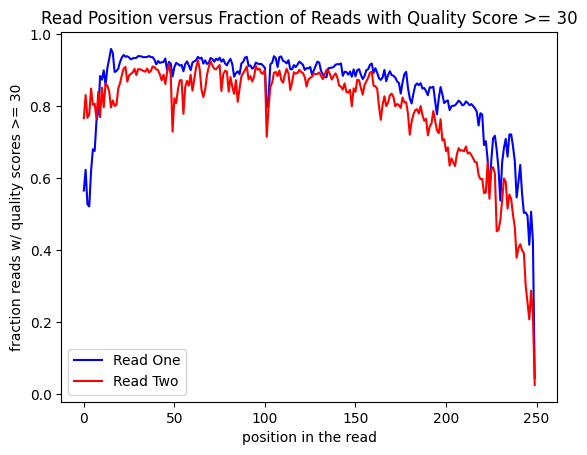

In [35]:
import matplotlib.pyplot as plt
plt.plot(read_one,color="blue",label="Read One")
plt.plot(read_two, color="red",label="Read Two")
plt.title("Read Position versus Fraction of Reads with Quality Score >= 30")
plt.xlabel("position in the read")
plt.ylabel("fraction reads w/ quality scores >= 30")
plt.legend(loc="lower left")
plt.show()

Task 2:

Write another function that for k from 0 to 250 will count the number of reads in the
file with exactly k bases with quality scores greater than or equal to 30. Plot the
output for each file (k on the x-axis, number of reads on the y-axis). Again put the
two plots (one for read #1 and the second for read #2) on the same figure (use
different colors for read #1 and read #2) so that you can easily compare read #1 and
read #2.

In [26]:
def read_across(file_name, read_len, quality_threshold):
    read_count = [0] * (read_len + 1)
    line_count = 0
    with open(file_name ,"r") as f_in:
        for line in f_in:
            line_count += 1
            if line_count % 4 == 0:
                temp = f_in.readline()
                temp = temp.replace("\n","")
                k_value = 0
                for i in range(read_len):
                    if ord(temp[i]) - 33 >= 30:
                        k_value += 1
                read_count[k_value] += 1
            else:
                temp = f_in.readline()
    return read_count 

read_one_across = read_across(first_read_name, 250, 30)
read_two_across = read_across(second_read_name, 250, 30)

[6, 1, 2, 4, 3, 5, 4, 4, 2, 2, 5, 0, 2, 1, 4, 3, 2, 1, 7, 0, 7, 2, 5, 7, 11, 2, 6, 3, 1, 2, 5, 1, 5, 3, 4, 0, 2, 2, 2, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 3, 3, 2, 1, 5, 4, 0, 2, 2, 2, 0, 3, 1, 1, 1, 2, 3, 3, 5, 1, 6, 2, 3, 1, 5, 2, 7, 4, 3, 5, 2, 2, 2, 1, 4, 8, 3, 3, 6, 2, 2, 2, 2, 4, 3, 6, 1, 3, 5, 6, 2, 2, 6, 3, 2, 4, 3, 3, 3, 3, 2, 3, 1, 5, 1, 0, 5, 3, 4, 9, 3, 4, 6, 6, 0, 5, 7, 6, 5, 2, 3, 4, 3, 3, 1, 5, 5, 6, 6, 2, 8, 5, 6, 3, 5, 4, 9, 5, 8, 5, 6, 7, 7, 8, 7, 6, 7, 4, 11, 10, 5, 5, 7, 7, 7, 8, 10, 10, 13, 19, 6, 9, 8, 13, 5, 7, 9, 10, 14, 11, 8, 15, 8, 9, 21, 12, 6, 7, 16, 14, 13, 17, 25, 12, 17, 16, 28, 10, 19, 13, 12, 21, 22, 21, 23, 25, 21, 26, 28, 29, 28, 32, 32, 40, 35, 33, 35, 37, 37, 40, 46, 52, 59, 58, 58, 66, 73, 55, 67, 77, 90, 107, 103, 116, 119, 115, 130, 122, 144, 142, 144, 150, 165, 156, 146, 152, 150, 184, 133, 133, 76, 4]


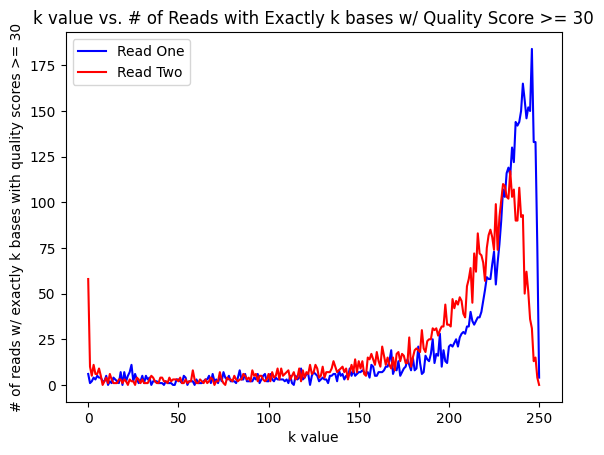

In [38]:
import matplotlib.pyplot as plt
plt.plot(read_one_across,color="blue",label="Read One")
plt.plot(read_two_across, color="red",label="Read Two")
plt.title("k value vs. # of Reads with Exactly k bases w/ Quality Score >= 30")
plt.xlabel("k value")
plt.ylabel("# of reads w/ exactly k bases with quality scores >= 30")
plt.legend(loc="upper left")
plt.show()

Questions based on these two files:

(a) What can you say about how sequence quality appears to depend on read position
(position 1 to 250)?

Based on the plots of read position versus proportion of reads with a high quality (score >= 30) for both reads 1 and 2, I observe a general trend where read quality decreases as we progress along the read length, eventually reaching its lowest quality at the terminus. For read 1, there appears to be a lower proportion of high-quality reads at the beginnng of the sequence as well, although this pattern is not observed for read 2. Generally, it appears that read quality is uniformly high across the start and middle of the sequence but drastically decreases as we approach the end of the sequence.  

(b) What can you say about how sequence quality appears to depend on read number
(read #1 or read #2)?

Based on the plot of read position vs. fraction of high-quality reads, along with the plot of k value vs number of reads with exactly k bases with high quality scores, it appears that sequence quality generally appears to be higher on average for read 1. First, the read position vs. fraction of high quality reads plot shows that near the end of the read, the proportion of high quality scores is consistently greater for read 1 compared to read 2. Although read 1 has a lower proportion of high quality scores near the beginning of the sequence, it appears that the advantage at the terminus of the sequence is still substantial to the extent that read 1 is favored over read 2 with regards to read quality. This conclusion is also support by the plot of k value versus number of reads with exactly k high-quality bases. The peak for read 1 is more right-shifted and covers greater area than the peak for read 2, indicating that there are a greater proportion of reads with a greater coverage of high-quality score positions for each read.  

(c) On slide 23 of our first lecture (“Introduction and Next Generation Sequencing”)
there was a link to a video about how Illumina sequencing works. Do your
answers to (a) and (b) agree with the process described in this video?

Based on the NGS video by Illumina, the results of our analysis concur with the nature of the technology because as potential errors in sequencing accumulate on the assay, it would make sense that we would obtain noisier signals (and thus lower quality reads) for later bases in the sequence. For instance, if a specific base that is added to one of the reads terminates the chain (and thus the chain cannot be extended further), we would have one less light signal that is emitted. Also, if a polymerase cannot add a specific base to one of the many strands on the flow cell, that specific strand will no longer participate in subsequent signals and thus the signal for each position will get progressively weaker. Although these errors are quite rare events, having a longer sequence means that there is a greater frequency of such errors and that these errors will accumulate as we read over the sequence. Therefore, it makes sense that the weakest (lowest quality) signals are towards the terminus of the sequence since  many errors would have accumulated and thus we would have less functional sequences that are being extended on the flow cell by polymerases. 